In [73]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np


In [74]:
df = pd.read_csv('Small_Set_Training_Upsampled.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)

#define dataset
Y = df['transportation_issues']
X = df.drop(columns=['transportation_issues'])

In [76]:
model = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=5, min_samples_split=1200,min_samples_leaf=50, subsample=0.8, random_state=10, max_features=13)

In [77]:
model.fit(X, Y)

GradientBoostingClassifier(learning_rate=0.005, max_depth=5, max_features=13,
                           min_samples_leaf=50, min_samples_split=1200,
                           n_estimators=1500, random_state=10, subsample=0.8)

In [60]:
test = pd.read_csv('Small_Set_Holdout.csv')

In [61]:
test.head()

,Unnamed: 0,ID,hosp_per_sq_mi,betos_d1d_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1b_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,bh_adtp_ind,...,total_ip_maternity_admit_days_pmpm,total_ip_mhsa_admit_ct_pmpm,total_ip_mhsa_admit_days_pmpm,total_ip_rehab_admit_ct_pmpm,total_ip_rehab_admit_days_pmpm,total_ip_snf_admit_ct_pmpm,total_ip_snf_admit_days_pmpm,total_outpatient_visit_ct_pmpm,total_physician_office_visit_ct_pmpm,total_urgent_care_visit_ct_pmpm
0,0,000M289dOSbe8dTL75c71YAI,0.097905,0.0,0.750000,0.166667,0.0,1.416667,0.500000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.916667,1.250000,0.083333
1,1,000b16MOSTLY7A637698c5I3,NaN,0.0,0.000000,0.084239,0.0,0.354494,0.336986,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.099519,0.767374,0.000000
2,2,0011MOdcfS9188T8aLYA3dIa,NaN,0.0,0.000000,0.126667,0.0,0.166667,0.083333,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.416667,0.583333,0.000000
3,3,001MO8SaT6dL8ae755cYA3dI,0.270893,0.0,0.083333,0.083333,0.0,0.333333,0.250000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.833333,0.000000
4,4,001MOS3a40Tc5L1534YAeI40,NaN,0.0,0.000000,0.146585,0.0,0.740945,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.411959,0.128753,0.000000


In [62]:
ID = test['ID']
X_test = test.drop(columns=['Unnamed: 0', 'ID', 'pdc_dep'])

In [63]:
X_test.head()

,hosp_per_sq_mi,betos_d1d_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1b_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,...,total_ip_maternity_admit_days_pmpm,total_ip_mhsa_admit_ct_pmpm,total_ip_mhsa_admit_days_pmpm,total_ip_rehab_admit_ct_pmpm,total_ip_rehab_admit_days_pmpm,total_ip_snf_admit_ct_pmpm,total_ip_snf_admit_days_pmpm,total_outpatient_visit_ct_pmpm,total_physician_office_visit_ct_pmpm,total_urgent_care_visit_ct_pmpm
0,0.097905,0.0,0.750000,0.166667,0.0,1.416667,0.500000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.916667,1.250000,0.083333
1,NaN,0.0,0.000000,0.084239,0.0,0.354494,0.336986,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.099519,0.767374,0.000000
2,NaN,0.0,0.000000,0.126667,0.0,0.166667,0.083333,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.416667,0.583333,0.000000
3,0.270893,0.0,0.083333,0.083333,0.0,0.333333,0.250000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.833333,0.000000
4,NaN,0.0,0.000000,0.146585,0.0,0.740945,0.000000,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.411959,0.128753,0.000000


In [64]:
for col in list(X_test.columns):
    try:
        X_test[col].replace(np.nan, X_test[col].median(), inplace=True)
    except:
        assert(X_test[col].isna().sum() == 0)
        
for col in list(X_test.columns):
    if X_test[col].isna().sum() != 0:
        print(col, X_test[col].isna().sum())

In [78]:
probabilities = model.predict_proba(X_test)

In [66]:
final = pd.DataFrame(columns = ['ID'])

In [67]:
final.head()

,ID


In [68]:
final['ID'] = ID

In [69]:
final.head()

,ID
0,000M289dOSbe8dTL75c71YAI
1,000b16MOSTLY7A637698c5I3
2,0011MOdcfS9188T8aLYA3dIa
3,001MO8SaT6dL8ae755cYA3dI
4,001MOS3a40Tc5L1534YAeI40


In [79]:
probabilities = probabilities[:, 1]

In [80]:
probabilities

array([0.83883427, 0.29525926, 0.44122466, ..., 0.51977225, 0.24113272,
       0.73032408])

In [81]:
final['score'] = probabilities

In [82]:
final.head()

,ID,score
0,000M289dOSbe8dTL75c71YAI,0.838834
1,000b16MOSTLY7A637698c5I3,0.295259
2,0011MOdcfS9188T8aLYA3dIa,0.441225
3,001MO8SaT6dL8ae755cYA3dI,0.299729
4,001MOS3a40Tc5L1534YAeI40,0.695867


In [85]:
final.sort_values(by='score', ascending=False, inplace=True)

In [86]:
final.head()

,ID,score
8347,M3OSd01500TL2aY0d5eAI1aa,0.940784
9514,M86Ob84bST8Le0016YAfIfaf,0.936100
5189,6fMO9ST1dLa734Yf34Ab1fIf,0.935618
3944,58M17OaSTL5c28fYAI18d609,0.926319
16535,e92M6Oeb57STcLbb98Y96AcI,0.920283


In [93]:
final['rank'] = final['score'].rank(method='min', ascending=False)

In [99]:
final['rank'] = final['rank'].astype(int)

In [100]:
final.head()

,ID,score,rank
8347,M3OSd01500TL2aY0d5eAI1aa,0.940784,1
9514,M86Ob84bST8Le0016YAfIfaf,0.936100,2
5189,6fMO9ST1dLa734Yf34Ab1fIf,0.935618,3
3944,58M17OaSTL5c28fYAI18d609,0.926319,4
16535,e92M6Oeb57STcLbb98Y96AcI,0.920283,5


In [90]:
len(final['score']) == len(set(final['score']))

True

In [105]:
ID = pd.DataFrame(test['ID'])
final_csv = ID.merge(final, on='ID')

In [103]:
ID

,ID
0,000M289dOSbe8dTL75c71YAI
1,000b16MOSTLY7A637698c5I3
2,0011MOdcfS9188T8aLYA3dIa
3,001MO8SaT6dL8ae755cYA3dI
4,001MOS3a40Tc5L1534YAeI40
...,...
17676,ffc0aMO78c3ST3LY9f9bfA5I
17677,ffd22M84OSdT0LYb07A8f9I5
17678,ffe9M2bae7OST85LYA85I650
17679,ffeM3Ofc6e47S3TLd41e1YAI


In [104]:
final

,ID,score,rank
8347,M3OSd01500TL2aY0d5eAI1aa,0.940784,1
9514,M86Ob84bST8Le0016YAfIfaf,0.936100,2
5189,6fMO9ST1dLa734Yf34Ab1fIf,0.935618,3
3944,58M17OaSTL5c28fYAI18d609,0.926319,4
16535,e92M6Oeb57STcLbb98Y96AcI,0.920283,5
...,...,...,...
16903,ecbMOfd0f5S9fTLaYc295AIe,0.135971,17677
4807,6M5b2OeSbTLYcb7edaAcf5bI,0.135043,17678
12850,Me38OS1b99TL7Yda3AdI5708,0.134109,17679
8285,M38edc4O109S25T40LYaA6eI,0.132183,17680


In [106]:
final_csv

,ID,score,rank
0,000M289dOSbe8dTL75c71YAI,0.838834,294
1,000b16MOSTLY7A637698c5I3,0.295259,12418
2,0011MOdcfS9188T8aLYA3dIa,0.441225,7244
3,001MO8SaT6dL8ae755cYA3dI,0.299729,12206
4,001MOS3a40Tc5L1534YAeI40,0.695867,1844
...,...,...,...
17676,ffc0aMO78c3ST3LY9f9bfA5I,0.277749,13311
17677,ffd22M84OSdT0LYb07A8f9I5,0.325798,11062
17678,ffe9M2bae7OST85LYA85I650,0.519772,5338
17679,ffeM3Ofc6e47S3TLd41e1YAI,0.241133,15181


In [107]:
final_csv.loc[final_csv['ID'] == 'M3OSd01500TL2aY0d5eAI1aa', 'score'].iloc[0]


0.9407839839416633

In [108]:
print(model.feature_importances_)

[7.74303547e-04 4.71859486e-04 9.42627278e-03 7.94628107e-03
 1.48465635e-03 1.08922236e-02 1.71519805e-03 7.22899064e-04
 8.51340301e-04 5.85178846e-03 5.30030939e-04 3.40852877e-03
 9.75635388e-03 1.01516072e-02 1.21890380e-02 5.50094418e-02
 3.39831460e-02 7.31075239e-02 6.98565998e-02 4.18993885e-02
 1.02504356e-03 1.46915656e-03 2.80442994e-03 1.62614193e-02
 1.46046883e-04 1.56502989e-04 4.00275021e-05 6.40362405e-05
 2.02089505e-04 5.23828609e-05 9.93033205e-04 7.90152368e-05
 4.62783479e-04 8.23379686e-05 8.71505128e-05 1.02934401e-04
 3.17674553e-03 4.33109728e-05 8.54327646e-05 3.11829732e-02
 1.28534383e-04 1.59750380e-03 1.07453299e-02 1.15147699e-02
 1.29421274e-02 7.60430506e-04 5.10881325e-03 4.99773953e-03
 1.54593237e-03 5.83271827e-03 2.47358148e-03 5.12532539e-03
 3.93275653e-03 2.54036611e-03 3.11204890e-03 2.83555659e-03
 3.01182150e-03 9.03966193e-03 3.30239281e-03 2.63322601e-03
 3.25067727e-03 2.38051977e-03 2.91375670e-03 4.64690186e-03
 3.36402366e-03 3.280973

In [109]:
importances = model.feature_importances_

In [110]:
features = X.columns

In [113]:
feature_importance = pd.DataFrame(list(zip(features, importances)), 
               columns =['Feature', 'Importance']) 

In [114]:
feature_importance

,Feature,Importance
0,hosp_per_sq_mi,0.000774
1,betos_d1d_pmpm_ct,0.000472
2,betos_m5c_pmpm_ct,0.009426
3,betos_m5d_pmpm_ct,0.007946
4,betos_o1b_pmpm_ct,0.001485
...,...,...
171,total_ip_snf_admit_ct_pmpm,0.000031
172,total_ip_snf_admit_days_pmpm,0.000533
173,total_outpatient_visit_ct_pmpm,0.003485
174,total_physician_office_visit_ct_pmpm,0.009239


In [115]:
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

In [116]:
feature_importance.head(n=20)

,Feature,Importance
74,est_age,0.117285
159,total_ambulance_visit_ct_pmpm,0.098917
17,cms_low_income_ind,0.073108
18,cms_rx_risk_score_nbr,0.069857
15,cms_disabled_ind,0.055009
19,cms_tot_ma_payment_amt,0.041899
16,cms_dual_eligible_ind,0.033983
39,cons_homstat_Y,0.031183
110,rx_overall_pmpm_ct,0.025726
160,total_er_visit_ct_pmpm,0.018937


In [117]:
final_csv.to_csv('CaseCompetition_Jack_Sampiere.csv')

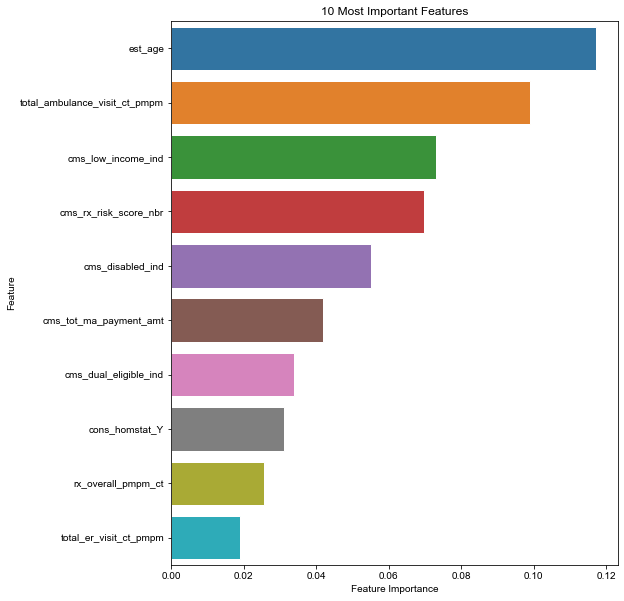

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

fig_dims = (8, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('darkgrid')
sns.barplot(x='Importance', y='Feature', ax=ax, data=feature_importance[:10])
ax.set_xlabel('Feature Importance')
ax.set_title('10 Most Important Features')
fig.savefig('10 Features GradientBoostingTrees.png')


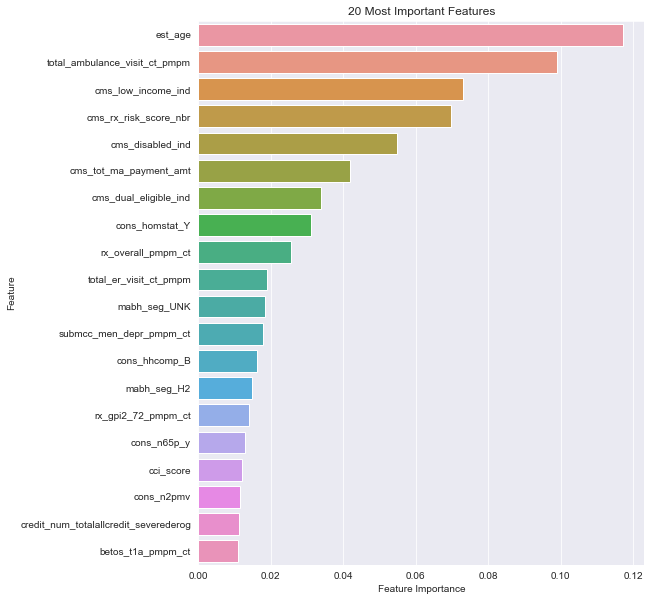

In [125]:
fig_dims = (8, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('darkgrid')
sns.barplot(x='Importance', y='Feature', ax=ax, data=feature_importance[:20])
ax.set_xlabel('Feature Importance')
ax.set_title('20 Most Important Features')
fig.savefig('20 Features GradientBoostingTrees.png')